## Polytope On-Demand Extremes-DT example notebook

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [5]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [6]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

In [5]:
import earthkit.data
import earthkit.plots
from polytope.api import Client

In [11]:
# Set True if you want to make a live request for the data, or false if you want to use the cached grib file
LIVE_REQUEST = True

## Data request

As for the global Extremes-DT output data is requested using the MARS language. The big difference here is that we have a new domain for every run which is done through the `georef` key, see below.

In [12]:
request = {
    'class': 'd1',
    'dataset': 'on-demand-extremes-dt',
    'expver': '0099',
    'stream': 'oper',
    'date': '20250616',
    'time': 0,
    'type': 'fc',
    'levtype': 'sfc',
    'georef': 'u4usq2',
    'step': 12,
    'param': 167
}

In [ ]:
if LIVE_REQUEST:
    data = earthkit.data.from_source("polytope", "destination-earth", request, address="polytope.lumi.apps.dte.destination-earth.eu", stream=False)
else:
    data = earthkit.data.from_source("file", "data/on-demands-extreme-dt-example.grib") 

## Data inspection

We can list the data using the `ls` method. Here we see e.g. that we run the model in the `lambert_lam` projection.

In [9]:
data.ls()

centre shortName        typeOfLevel  level  dataDate  dataTime stepRange  \
0   ecmf        2t  heightAboveGround      2  20250616         0        12   

  dataType number     gridType  
0       fc   None  lambert_lam

## Plotting

Finally we create plot of the data retrieved using earthkit-plots.

ECCODES WARNING :  Key gridSpec is not yet implemented. Work in progress...


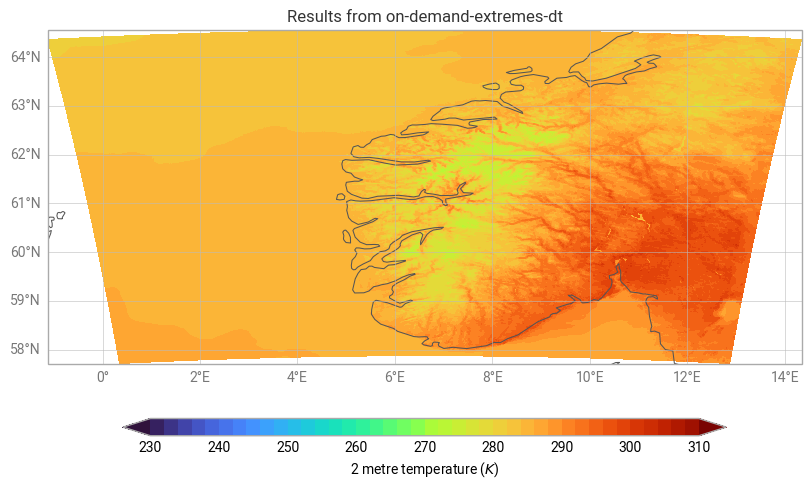

In [10]:
chart = earthkit.plots.Map()
chart.quickplot(data)
chart.title(f"Results from on-demand-extremes-dt")
chart.coastlines()
chart.gridlines()
chart.legend()
chart.show()